<a href="https://colab.research.google.com/github/Kairos5106/information-retrieval-system-evaluation/blob/main/data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QREL Data Analysis

## Instructions

To properly use this notebook, refer to the readme.md file in the root folder

## Project Setup
Change the variables in the code block below. Then run all of the cells and the programs should start analysing the files

In [1]:
# Change the variables below according to your own environment

qrel_file_name = "qrels.trec8.adhoc" # change this according to your QREL file name

### Project imports

In [2]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics
import scipy

# Miscallaneous imports
import os # for file loading

In [ ]:
# To get your current path
current_folder = os.getcwd()

print(f"The current folder path is: {current_folder}")

The current folder path is: /Users/kevinhtw/Documents/UM-BCS/SEM 6/WIE3004 Information Retrieval and Web Search/data-analysis


### Loading data

In [ ]:
# Set the paths to your own folder here
input_files_folder_path = current_folder + "/input"
qrel_file_path = current_folder + "/qrel/" + qrel_file_name
output_file_path = current_folder + "/output"

# For debugging, ignore
print(f"Input files path: {input_files_folder_path}")
print(f"Number of files found: {len(os.listdir(input_files_folder_path))}")
print(f"Path has files? >> {os.path.exists(input_files_folder_path)} \n{os.listdir(input_files_folder_path)}")

print(f"\nQREL file path: {qrel_file_path}")
print(f"QREL file found? >> {os.path.isfile(qrel_file_path)}")

Input files path: /Users/kevinhtw/Documents/UM-BCS/SEM 6/WIE3004 Information Retrieval and Web Search/data-analysis/input
Number of files found: 16
Path has files? >> True 
['input.ok8amxc', 'input.plt8ah1', 'input.GE8MTD2', 'input.apl8c221.apl8c221', 'input.Scai8Adhoc', 'input.isa25t', '.gitkeep', 'input.ric8dpn', 'input.UB99T', 'input.1.1', 'input.Flab8ax', 'input.mds08a2', 'input.iit99au1', 'input.Dm8Nbn', 'input.att99ate', 'input.MITSLStd']

QREL file path: /Users/kevinhtw/Documents/UM-BCS/SEM 6/WIE3004 Information Retrieval and Web Search/data-analysis/qrel/qrels.trec8.adhoc
QREL file found? >> True


#### Loading input data

In [ ]:
dataset = pd.DataFrame()
input_files = os.listdir(input_files_folder_path)
if '.gitkeep' in input_files:
    input_files.remove('.gitkeep')
input_file_cols = ['query_id', 'placeholder', 'doc_id', 'rank', 'score', 'input_file']

for input_file in input_files:
    input_file_path = os.path.join(input_files_folder_path, input_file)
    df = pd.read_csv(
        input_file_path,
        sep='\t',  # tab-separated
        header=None,
        names=input_file_cols
    )
    df['input_file'] = str(input_file).replace('input.', '').strip()  # Add correct file name as a column
    dataset = pd.concat([dataset, df], ignore_index=True)

dataset

,query_id,placeholder,doc_id,rank,score,input_file
0,401,Q0,FBIS4-18182,0,3.590320,ok8amxc
1,401,Q0,FBIS3-18916,1,3.449360,ok8amxc
2,401,Q0,FBIS3-18833,2,3.408860,ok8amxc
3,401,Q0,FBIS3-39117,3,3.253320,ok8amxc
4,401,Q0,FBIS3-17077,4,3.154300,ok8amxc
...,...,...,...,...,...,...
724607,450,Q0,FT933-6066,996,-0.356903,MITSLStd
724608,450,Q0,FBIS4-6814,997,-0.356962,MITSLStd
724609,450,Q0,LA121190-0027,998,-0.358896,MITSLStd
724610,450,Q0,FBIS4-51493,999,-0.358901,MITSLStd


In [ ]:
# Checking for missing topics
dataset[dataset['input_file'] == '.gitkeep']

,query_id,placeholder,doc_id,rank,score,input_file


#### Loading QREL data

In [ ]:
# Getting data from QREL file
qrel_file_cols = [
  'query_id', 'placeholder', 'doc_id', 'relevance'
]

qrel = pd.read_csv(
  qrel_file_path,
  sep=r'\s+', # qrel file uses whitespaces as delimiter
  names=qrel_file_cols,
  header=None
)

qrel # preview the qrel file

,query_id,placeholder,doc_id,relevance
0,401,0,FBIS3-10009,0
1,401,0,FBIS3-10059,0
2,401,0,FBIS3-10142,0
3,401,0,FBIS3-1026,0
4,401,0,FBIS3-10502,0
...,...,...,...,...
86825,450,0,LA123090-0138,0
86826,450,0,LA123090-0146,0
86827,450,0,LA123090-0176,0
86828,450,0,LA123090-0195,0


## Exploratory Data Analysis & Data Cleaning

### Input files

Here, we check for any missing data and to find out the general trends of our input files dataset

In [ ]:
print(dataset.head()) # before
dataset.drop(columns='placeholder', inplace=True)
print(dataset.head()) # after

   query_id placeholder       doc_id  rank    score input_file
0       401          Q0  FBIS4-18182     0  3.59032    ok8amxc
1       401          Q0  FBIS3-18916     1  3.44936    ok8amxc
2       401          Q0  FBIS3-18833     2  3.40886    ok8amxc
3       401          Q0  FBIS3-39117     3  3.25332    ok8amxc
4       401          Q0  FBIS3-17077     4  3.15430    ok8amxc
   query_id       doc_id  rank    score input_file
0       401  FBIS4-18182     0  3.59032    ok8amxc
1       401  FBIS3-18916     1  3.44936    ok8amxc
2       401  FBIS3-18833     2  3.40886    ok8amxc
3       401  FBIS3-39117     3  3.25332    ok8amxc
4       401  FBIS3-17077     4  3.15430    ok8amxc


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  object 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 27.6+ MB


Turns out that the doc_id and input_file columns are somehow of the type 'object'. Let's fix that

In [ ]:
dataset['query_id'] = dataset['query_id'].astype(int)
dataset['doc_id'] = dataset['doc_id'].astype('string')
dataset['input_file'] = dataset['input_file'].astype('string')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  string 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  string 
dtypes: float64(1), int64(2), string(2)
memory usage: 27.6 MB


In [ ]:
dataset

,query_id,doc_id,rank,score,input_file
0,401,FBIS4-18182,0,3.590320,ok8amxc
1,401,FBIS3-18916,1,3.449360,ok8amxc
2,401,FBIS3-18833,2,3.408860,ok8amxc
3,401,FBIS3-39117,3,3.253320,ok8amxc
4,401,FBIS3-17077,4,3.154300,ok8amxc
...,...,...,...,...,...
724607,450,FT933-6066,996,-0.356903,MITSLStd
724608,450,FBIS4-6814,997,-0.356962,MITSLStd
724609,450,LA121190-0027,998,-0.358896,MITSLStd
724610,450,FBIS4-51493,999,-0.358901,MITSLStd


#### Number of entries from each file

In [ ]:
dataset.input_file.value_counts()

input_file
ok8amxc              50000
GE8MTD2              50000
apl8c221.apl8c221    50000
ric8dpn              50000
UB99T                50000
Flab8ax              50000
mds08a2              50000
Dm8Nbn               50000
att99ate             50000
MITSLStd             50000
isa25t               49065
iit99au1             48766
plt8ah1              48259
Scai8Adhoc           47182
1.1                  31340
Name: count, dtype: Int64

### QREL file
We explore the structure of the file here and examine some of its metadata

We don't need the placeholder so we're getting rid of that

In [ ]:
qrel.drop(columns="placeholder", inplace=True)
qrel

,query_id,doc_id,relevance
0,401,FBIS3-10009,0
1,401,FBIS3-10059,0
2,401,FBIS3-10142,0
3,401,FBIS3-1026,0
4,401,FBIS3-10502,0
...,...,...,...
86825,450,LA123090-0138,0
86826,450,LA123090-0146,0
86827,450,LA123090-0176,0
86828,450,LA123090-0195,0


In [ ]:
qrel.relevance.value_counts()

relevance
0    82102
1     4728
Name: count, dtype: int64

This shows that the relevance column only has two possible values: 0s and 1s - with 0s representing an irrelevant document and vice versa with 1s

### Utility functions
Just a few reusable functions that help to speed up the process of analysis

#### Get unique topics

In [ ]:
# @input dataset: DataFrame = aggregated data set
# @input input_file: string = name of run
#
# Returns a list of unique queries in an input file
def get_unique_topics(dataset, input_file, verbose = False):

  query_rows = dataset[dataset['input_file'] == input_file]
  unique_queries_list = query_rows['query_id'].unique()

  if verbose:
    print(f"{input_file}: {len(unique_queries_list)} unique topics")

  return unique_queries_list

#### Get unique input files

In [ ]:
# @input none
#
# Returns a list of all unique topics for an input file
def get_input_files(verbose = False):
  unique_input_files = os.listdir(input_files_folder_path)
  if '.gitkeep' in unique_input_files:
    unique_input_files.remove('.gitkeep')

  for index, input_file in enumerate(unique_input_files):
    unique_input_files[index] = str(unique_input_files[index]).replace('input.', '').strip()

  if verbose:
    print(f"Input files ({len(unique_input_files)}): {unique_input_files}")

  return unique_input_files

## Result & Analysis
In this section, we calculate some important metrics to evaluate the effectiveness of each search engine's results

### Mean Average Precision (MAP)
MAP is the mean of average precisions (APs) across multiple queries. So, in order to calculate that, we would need to calculate the APs of the queries in a single input file. The formula for average precision is:

> Average Precision (AP) = 1 / (N) * ( sum of (P(k) * rel(k)) )

where N = total number of relevant documents, P(k) is the precision at rank k, and rel(k) = 1 if the document is relevant and 0 otherwise

For instance, take the table below which is a list of documents returned for query A:

| Rank | Doc ID       | Relevance |
|------|--------------|-----------|
| 1    | FBIS4-20472  | 1         |
| 2    | FBIS4-68893  | 0         |
| 3    | FR941117...  | 1         |
| 4    | FBIS3-37947  | 0         |
| 5    | FBIS4-29     | 1         |

Then:

At rank 1: Precision = 1/1 = 1.0

At rank 3: Precision = 2/3 ≈ 0.667

At rank 5: Precision = 3/5 = 0.6

___

With that being said, let's modify our dataset by joining in the relevance judgment file

In [ ]:
qrel.head() # as a recap, this is how the QREL file looks like

,query_id,doc_id,relevance
0,401,FBIS3-10009,0
1,401,FBIS3-10059,0
2,401,FBIS3-10142,0
3,401,FBIS3-1026,0
4,401,FBIS3-10502,0


In [ ]:
dataset_merged = pd.merge(
  dataset,
  qrel[['query_id', 'doc_id', 'relevance']],
  on=['query_id', 'doc_id'],
  how='left'
)
dataset_merged

,query_id,doc_id,rank,score,input_file,relevance
0,401,FBIS4-18182,0,3.590320,ok8amxc,0.0
1,401,FBIS3-18916,1,3.449360,ok8amxc,0.0
2,401,FBIS3-18833,2,3.408860,ok8amxc,0.0
3,401,FBIS3-39117,3,3.253320,ok8amxc,0.0
4,401,FBIS3-17077,4,3.154300,ok8amxc,0.0
...,...,...,...,...,...,...
724607,450,FT933-6066,996,-0.356903,MITSLStd,NaN
724608,450,FBIS4-6814,997,-0.356962,MITSLStd,NaN
724609,450,LA121190-0027,998,-0.358896,MITSLStd,0.0
724610,450,FBIS4-51493,999,-0.358901,MITSLStd,NaN


Apparently there are some null values for relevance. Let's find out how many are null

In [ ]:
dataset_merged.relevance.value_counts()

relevance
0.0    272717
1.0     35722
Name: count, dtype: int64

In [ ]:
dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  object 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  string 
 5   relevance   308439 non-null  float64
dtypes: float64(2), int64(2), object(1), string(1)
memory usage: 33.2+ MB


This signifies that there are only about 300,000 entries with non-null values. Let's fill up the null values with 0, that is assuming that they are not relevant as they are not judged

In [ ]:
dataset_merged['relevance'] = dataset_merged['relevance'].fillna(0).astype(int)
dataset_merged['relevance'] = dataset_merged['relevance'].astype(int)
dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  object 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  string 
 5   relevance   724612 non-null  int64  
dtypes: float64(1), int64(3), object(1), string(1)
memory usage: 33.2+ MB


In [ ]:
dataset_merged.relevance.value_counts()

relevance
0    688890
1     35722
Name: count, dtype: int64

#### Average Precision

In [ ]:
# Calculates the average precision of a query
# query = int, input_file = string
def average_precision(query_id, input_file, verbose = False):
  # Collect all the rows for a query
  rows = dataset_merged[
    (dataset_merged['query_id'] == query_id) &
    (dataset_merged['input_file'] == input_file)
  ]

  # Calculate precision for all documents in that query
  relevance_values = rows.sort_values('rank')['relevance'].values
  precisions = []
  number_of_related_docs = 0

  for index, relevance_value in enumerate(relevance_values, start=1): # start at index 1 to skip the header
    doc_is_relevant = (relevance_value == 1)
    if doc_is_relevant:
      number_of_related_docs += 1
      precisions.append(
        number_of_related_docs / index # formula for precision
      )

  result = sum(precisions) / number_of_related_docs if number_of_related_docs > 0 else 0.0

  if verbose:
    print(precisions)
    print(f"AP - {input_file}: {len(precisions)} relevant documents for query {query_id}")
    print(f"AP - {input_file}: {result}")

  # Calculate AP
  return result

In [ ]:
def get_average_precision_values_table(verbose=False):
    # Collect all topics from all input files to build full topic list
    all_topics = set()
    for input_file in get_input_files():
        topics = get_unique_topics(dataset_merged, input_file)
        all_topics.update(topics)

    # Sort topics for consistency
    all_topics = sorted(list(all_topics))

    # Initialize DataFrame with 'topic' column
    average_precision_table = pd.DataFrame({'topic': all_topics})

    # Fill in average precision values for each input file
    for input_file in get_input_files():
        ap_values = []
        for topic in all_topics:
            ap = average_precision(topic, input_file)
            ap_values.append(ap)
        # Add new column for this input file
        average_precision_table[input_file] = ap_values

    if verbose:
        print(average_precision_table)

    average_precision_table.to_excel(output_file_path + "/average_precision_table.xlsx", index=False)

    return average_precision_table

In [ ]:
get_average_precision_values_table()

,topic,ok8amxc,plt8ah1,GE8MTD2,apl8c221.apl8c221,Scai8Adhoc,isa25t,ric8dpn,UB99T,1.1,Flab8ax,mds08a2,iit99au1,Dm8Nbn,att99ate,MITSLStd
0,401,0.058793,0.059539,0.669227,0.441793,0.010414,0.022466,0.014066,0.035118,0.017095,0.119884,0.046878,0.060003,0.057802,0.276485,0.153240
1,402,0.330309,0.158006,0.318446,0.420730,0.105621,0.052108,0.278465,0.041263,0.020466,0.430248,0.239173,0.275157,0.217019,0.286207,0.293589
2,403,0.848336,0.630792,0.866809,0.881684,0.780341,0.387609,0.694386,0.252090,0.000000,0.908171,0.760049,0.875453,0.459255,0.819372,0.833250
3,404,0.279392,0.164656,0.225494,0.253654,0.090115,0.000000,0.216562,0.110873,0.025289,0.229795,0.218313,0.223555,0.061366,0.217680,0.275025
4,405,0.237162,0.075887,0.496746,0.349919,0.135104,0.001091,0.225198,0.071070,0.000000,0.297788,0.209272,0.509551,0.145533,0.209780,0.203067
5,406,0.477309,0.216715,0.395907,0.473331,0.223434,0.000000,0.407537,0.019231,0.005203,0.380312,0.306775,0.437208,0.340999,0.498380,0.484998
6,407,0.480336,0.340042,0.359011,0.388208,0.236489,0.567553,0.267092,0.099719,0.080449,0.494983,0.327071,0.435181,0.096040,0.588818,0.393589
7,408,0.354356,0.286664,0.315147,0.369019,0.067606,0.327780,0.315552,0.053254,0.009157,0.380317,0.310082,0.318906,0.152008,0.279555,0.414916
8,409,0.209126,0.012697,0.286704,0.234607,0.011214,0.004049,0.140050,0.059843,0.000000,0.170158,0.172880,0.132210,0.150989,0.171535,0.210841
9,410,0.870235,0.000000,0.760346,0.822722,0.910231,0.000000,0.835623,0.030208,0.003247,0.904289,0.846635,0.749186,0.237233,0.883749,0.880110


#### Mean Average Precision (MAP)

In [ ]:
# input_file: string = name of the input file
def mean_average_precision(input_file, verbose = False):
  # Fetch the number of unique query_ids
  unique_queries_list = get_unique_topics(dataset_merged, input_file, verbose)

  # Iterate over all query_ids using average_precision function
  sum_of_average_precisions = 0.0

  for query_id in unique_queries_list:
    sum_of_average_precisions += average_precision(query_id, input_file, verbose)

  mean_average_precision = sum_of_average_precisions / len(unique_queries_list)

  if verbose:
    print(f"MAP - {input_file}: {mean_average_precision}")

  return mean_average_precision

##### MAP Values For All Input Files
Now that we have the mean_average_precision calculation done, let's generate a table to get a better view

In [ ]:
mean_average_precision_table = pd.DataFrame({
  'input_file': [], 'mean_average_precision': []
})

# Calculate MAP iteratively for all runs
for input_file in get_input_files():
  input_file_map = mean_average_precision(input_file, verbose=True)
  row = pd.DataFrame({ 'input_file': [input_file], 'mean_average_precision': [input_file_map]})

  mean_average_precision_table = pd.concat([mean_average_precision_table, row], ignore_index=True)

mean_average_precision_table.index = mean_average_precision_table.index + 1 # just so the first file appears as number 1 on the list

mean_average_precision_table.to_excel(output_file_path + "/mean_average_precision_table.xlsx", index=False)

ok8amxc: 50 unique topics
[0.09090909090909091, 0.045454545454545456, 0.039473684210526314, 0.04597701149425287, 0.054945054945054944, 0.05825242718446602, 0.06363636363636363, 0.055944055944055944, 0.046153846153846156, 0.050505050505050504, 0.05527638190954774, 0.05660377358490566, 0.05439330543933055, 0.058333333333333334, 0.06172839506172839, 0.06477732793522267, 0.06028368794326241, 0.06, 0.06209150326797386, 0.06349206349206349, 0.06382978723404255, 0.0650887573964497, 0.0610079575596817, 0.061381074168797956, 0.06329113924050633, 0.06388206388206388, 0.06235565819861432, 0.06451612903225806, 0.06605922551252848, 0.066815144766147, 0.06567796610169492, 0.06299212598425197, 0.06483300589390963, 0.06093189964157706, 0.06227758007117438, 0.0594059405940594, 0.060064935064935064, 0.05855161787365177, 0.058646616541353384, 0.059084194977843424, 0.059854014598540145, 0.058823529411764705, 0.057640750670241284, 0.05605095541401274, 0.0550122249388753, 0.054373522458628844, 0.05396096440

A bar graph would help to see which runs performed the best

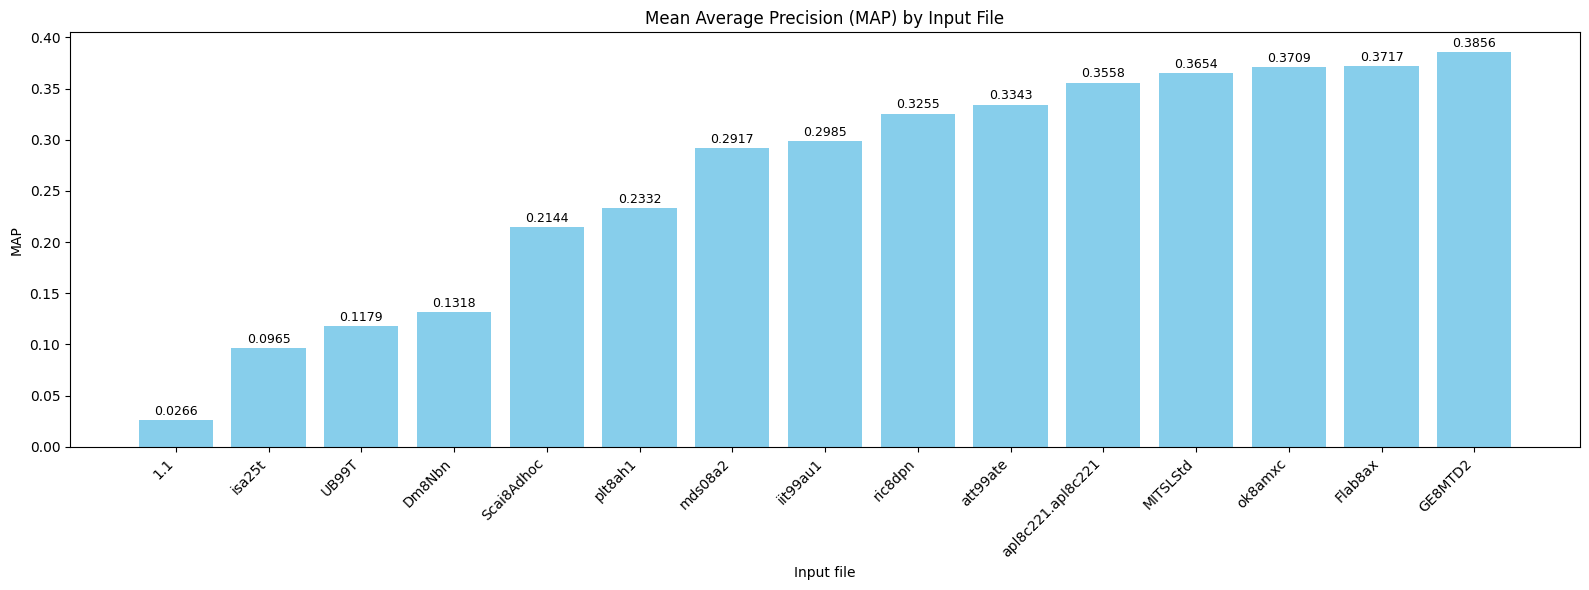

In [ ]:
map_table_asc = mean_average_precision_table.sort_values('mean_average_precision')

plt.figure(figsize=[16, 6])

plt.bar(
  map_table_asc['input_file'], # x-axis values
  map_table_asc['mean_average_precision'], # y-axis values
  color='skyblue'
)

plt.xlabel('Input file')
plt.ylabel('MAP')
plt.title('Mean Average Precision (MAP) by Input File')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add values above bars
for i, v in enumerate(map_table_asc['mean_average_precision']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Mean Reciprocal Rank (MRR)

MRR measures how well a information retrieval system ranks its first relevant document for each query. Below is the formula:

> MRR = (1 / |Q|) * (sum of (1 / ith-rank) from i = 1 to |Q|)

where |Q| = total number of queries, ith-rank = first relevant document for the ith query


To put it simply:
1. Find the first document that is relevant for a query
2. Compute the reciprocal of the rank for that query, i.e. (1 / rank)
3. Then, find the average of all reciprocal ranks for all queries
4. The mean of the average refers to the MRR value for an input file

#### Reciprocal Rank (RR)

In [ ]:
# Calculates the reciprocal rank for a query
def reciprocal_rank(query_id, input_file, verbose = False):
  first_relevant_row = dataset_merged[
    (dataset_merged['query_id'] == query_id) &
    (dataset_merged['relevance'] != 0) &
    (dataset_merged['input_file'] == input_file)
  ].sort_values('rank').head(1)

  if first_relevant_row.empty:
    if verbose:
      print(f"RR - {input_file} (Query {query_id}: 0.0 - **NO RELEVANT DOC FOUND**")
    return 0.0

  first_relevant_rank = first_relevant_row.iloc[0]['rank']

  if first_relevant_rank == 0:
    return 1
  else:
    result = float(1 / first_relevant_rank)

  if verbose:
    print(f"RR - {input_file} (Query {query_id}): First relevant row\n{first_relevant_row}")
    print(f"RR - {input_file} (Query {query_id}: {result})")

  return result

In [ ]:
def get_reciprocal_rank_values_table(verbose=False):
    # Collect all topics from all input files to build full topic list
    all_topics = set()
    for input_file in get_input_files():
        topics = get_unique_topics(dataset_merged, input_file)
        all_topics.update(topics)

    # Sort topics for consistency
    all_topics = sorted(list(all_topics))

    # Initialize DataFrame with 'topic' column
    reciprocal_rank_table = pd.DataFrame({'topic': all_topics})

    # Fill in average precision values for each input file
    for input_file in get_input_files():
        rr_values = []
        for topic in all_topics:
            ap = reciprocal_rank(topic, input_file)
            rr_values.append(ap)
        # Add new column for this input file
        reciprocal_rank_table[input_file] = rr_values

    if verbose:
        print(reciprocal_rank_table)

    reciprocal_rank_table.to_excel(output_file_path + "/reciprocal_rank_table.xlsx", index=False)

    return reciprocal_rank_table

In [ ]:
get_reciprocal_rank_values_table()

,topic,ok8amxc,plt8ah1,GE8MTD2,apl8c221.apl8c221,Scai8Adhoc,isa25t,ric8dpn,UB99T,1.1,Flab8ax,mds08a2,iit99au1,Dm8Nbn,att99ate,MITSLStd
0,401,0.100000,0.032258,1.000000,1.000000,0.016667,0.035714,0.005000,0.017241,0.020408,1.000000,0.047619,0.250000,0.021277,1.000000,0.500000
1,402,1.000000,1.000000,1.000000,1.000000,0.500000,0.090909,1.000000,0.071429,0.006410,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,403,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.500000,0.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
3,404,1.000000,0.052632,1.000000,1.000000,0.125000,0.000000,0.111111,0.125000,0.010417,0.500000,0.083333,0.500000,0.250000,0.166667,1.000000
4,405,1.000000,0.250000,1.000000,1.000000,0.333333,0.001091,0.333333,0.166667,0.000000,1.000000,0.333333,1.000000,1.000000,0.333333,0.500000
5,406,1.000000,0.333333,1.000000,1.000000,1.000000,0.000000,1.000000,0.019608,0.003731,0.500000,0.333333,1.000000,1.000000,1.000000,1.000000
6,407,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,408,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.062500,0.017544,1.000000,1.000000,1.000000,0.250000,0.500000,1.000000
8,409,1.000000,0.012658,1.000000,1.000000,0.025000,0.004049,0.500000,0.125000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
9,410,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.031250,0.003247,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Mean Reciprocal Rank (MRR)

In [ ]:
# input_file: string = name of the input file
def mean_reciprocal_rank(input_file, verbose = False):
  # Fetch the number of unique query_ids
  unique_queries_list = get_unique_topics(dataset_merged, input_file, verbose)

  # Iterate over all query_ids using reciprocal_rank function
  sum_of_reciprocal_ranks = 0.0

  for query_id in unique_queries_list:
    sum_of_reciprocal_ranks += reciprocal_rank(query_id, input_file, verbose)

  mean_reciprocal_rank = sum_of_reciprocal_ranks / len(unique_queries_list)

  if verbose:
    print(f"MAP - {input_file}: {mean_reciprocal_rank}")

  return mean_reciprocal_rank

In [ ]:
mean_reciprocal_rank_table = pd.DataFrame({
  'input_file': [], 'mean_reciprocal_rank': []
})

# Calculate MAP iteratively for all runs
for input_file in get_input_files():
  input_file_map = mean_reciprocal_rank(input_file, verbose=True)
  row = pd.DataFrame({ 'input_file': [input_file], 'mean_reciprocal_rank': [input_file_map]})

  mean_reciprocal_rank_table = pd.concat([mean_reciprocal_rank_table, row], ignore_index=True)

mean_reciprocal_rank_table.index = mean_reciprocal_rank_table.index + 1 # just so the first file appears as number 1 on the list

mean_reciprocal_rank_table.to_excel(output_file_path + "/mean_reciprocal_rank_table.xlsx", index=False)

ok8amxc: 50 unique topics
RR - ok8amxc (Query 401): First relevant row
    query_id       doc_id  rank    score input_file  relevance
10       401  FBIS3-59042    10  2.76103    ok8amxc          1
RR - ok8amxc (Query 401: 0.1)
RR - ok8amxc (Query 404): First relevant row
      query_id      doc_id  rank    score input_file  relevance
3001       404  FT943-6251     1  2.97662    ok8amxc          1
RR - ok8amxc (Query 404: 1.0)
RR - ok8amxc (Query 412): First relevant row
       query_id         doc_id  rank    score input_file  relevance
11001       412  LA031289-0199     1  3.40477    ok8amxc          1
RR - ok8amxc (Query 412: 1.0)
RR - ok8amxc (Query 414): First relevant row
       query_id       doc_id  rank    score input_file  relevance
13001       414  FT944-11926     1  3.68297    ok8amxc          1
RR - ok8amxc (Query 414: 1.0)
RR - ok8amxc (Query 416): First relevant row
       query_id       doc_id  rank    score input_file  relevance
15001       416  FBIS4-66355     1  5.465

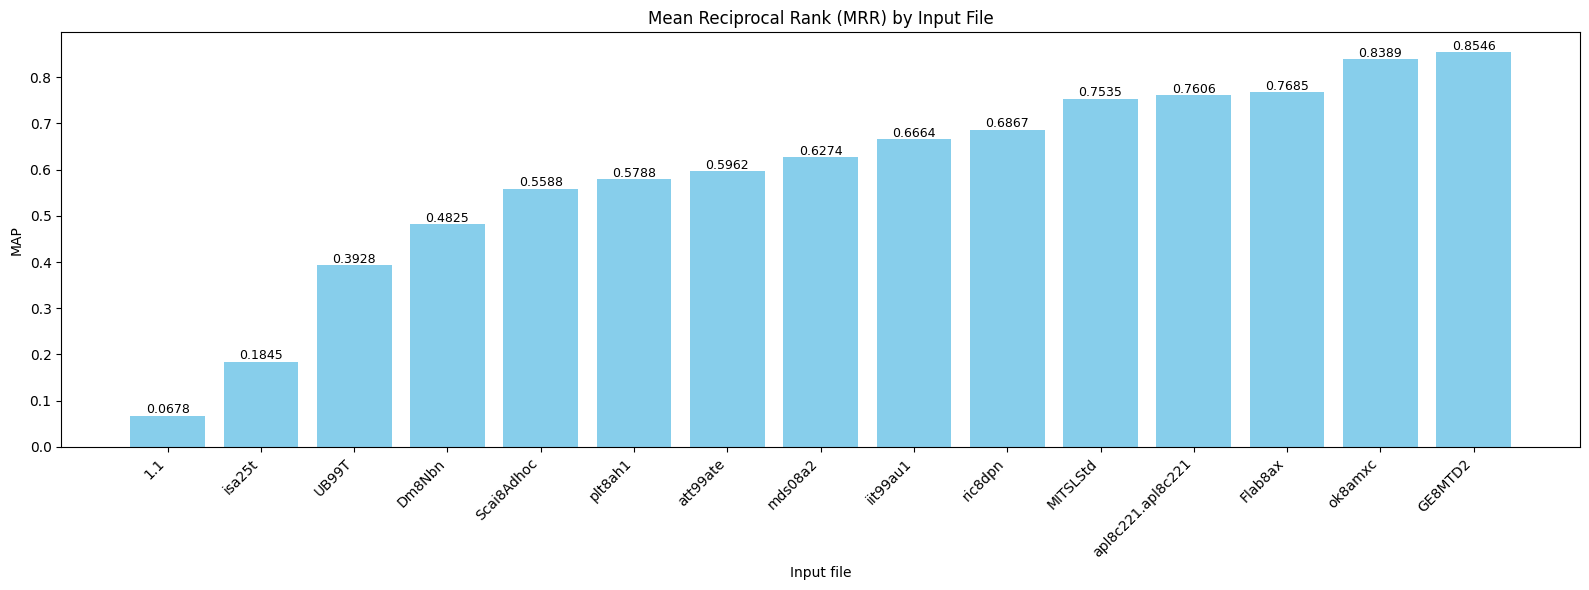

In [ ]:
mrr_table_asc = mean_reciprocal_rank_table.sort_values('mean_reciprocal_rank')

plt.figure(figsize=[16, 6])

plt.bar(
  mrr_table_asc['input_file'], # x-axis values
  mrr_table_asc['mean_reciprocal_rank'], # y-axis values
  color='skyblue'
)

plt.xlabel('Input file')
plt.ylabel('MAP')
plt.title('Mean Reciprocal Rank (MRR) by Input File')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add values above bars
for i, v in enumerate(mrr_table_asc['mean_reciprocal_rank']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Precision @ 10

In [ ]:
def precision_at_k(query_id, input_file, k=10, verbose=False):
    rows = dataset_merged[
        (dataset_merged['query_id'] == query_id) &
        (dataset_merged['input_file'] == input_file)
    ].sort_values('rank').head(k)

    relevant = rows['relevance'].sum()
    precision = relevant / k

    if verbose:
        print(f"P@{k} - {input_file} (Query {query_id}):")
        print(rows[['doc_id', 'rank', 'relevance']])
        print(f"→ Relevant: {int(relevant)} / {k} → P@{k}: {precision:.4f}\n")

    return precision

In [ ]:
def get_precision_at_k_values_table(verbose=False):
    # Collect all topics from all input files to build full topic list
    all_topics = set()
    for input_file in get_input_files():
        topics = get_unique_topics(dataset_merged, input_file)
        all_topics.update(topics)

    # Sort topics for consistency
    all_topics = sorted(list(all_topics))

    # Initialize DataFrame with 'topic' column
    precision_at_k_table = pd.DataFrame({'topic': all_topics})

    # Fill in precision at k values for each input file
    for input_file in get_input_files():
        pk_values = []
        for topic in all_topics:
            value = precision_at_k(topic, input_file)
            pk_values.append(value)
        # Add new column for this input file
        precision_at_k_table[input_file] = pk_values

    if verbose:
        print(precision_at_k_table)

    precision_at_k_table.to_excel(output_file_path + "/precision_at_k_table.xlsx", index=False)

    return precision_at_k_table

In [ ]:
get_precision_at_k_values_table()

,topic,ok8amxc,plt8ah1,GE8MTD2,apl8c221.apl8c221,Scai8Adhoc,isa25t,ric8dpn,UB99T,1.1,Flab8ax,mds08a2,iit99au1,Dm8Nbn,att99ate,MITSLStd
0,401,0.0,0.0,1.0,0.7,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.1,0.0,0.4,0.3
1,402,0.6,0.2,0.6,0.8,0.2,0.0,0.5,0.0,0.0,0.9,0.5,0.8,0.6,0.6,0.7
2,403,1.0,0.7,1.0,1.0,0.9,0.3,0.9,0.5,0.0,1.0,0.9,1.0,0.6,0.9,0.9
3,404,0.6,0.0,0.4,0.4,0.1,0.0,0.2,0.1,0.0,0.3,0.0,0.2,0.1,0.2,0.4
4,405,0.3,0.1,0.6,0.6,0.2,0.0,0.4,0.1,0.0,0.4,0.4,0.6,0.2,0.3,0.2
5,406,0.6,0.3,0.4,0.6,0.2,0.0,0.5,0.0,0.0,0.5,0.3,0.6,0.2,0.5,0.4
6,407,0.9,0.6,0.6,0.8,0.3,0.8,0.3,0.1,0.1,1.0,0.5,0.7,0.3,0.9,0.7
7,408,0.6,0.2,0.7,0.3,0.1,0.6,0.4,0.0,0.0,0.4,0.4,0.5,0.1,0.2,0.4
8,409,0.3,0.0,0.4,0.3,0.0,0.0,0.2,0.1,0.0,0.2,0.2,0.3,0.2,0.1,0.4
9,410,1.0,0.0,1.0,1.0,1.0,0.0,0.9,0.0,0.0,1.0,1.0,1.0,0.5,1.0,1.0


In [ ]:
def mean_precision_at_k(input_file, k=10, verbose=False):
    unique_queries = get_unique_topics(dataset_merged, input_file)
    if verbose:
        print(f"\n{input_file}: {len(unique_queries)} unique topics")

    total = 0.0
    for query_id in unique_queries:
        total += precision_at_k(query_id, input_file, k=k, verbose=verbose)

    return total / len(unique_queries)

In [ ]:
for input_file in get_input_files():
    _ = mean_precision_at_k(input_file, 10, verbose=True)


ok8amxc: 50 unique topics
P@10 - ok8amxc (Query 401):
        doc_id  rank  relevance
0  FBIS4-18182     0          0
1  FBIS3-18916     1          0
2  FBIS3-18833     2          0
3  FBIS3-39117     3          0
4  FBIS3-17077     4          0
5  FBIS3-18684     5          0
6  FBIS3-19645     6          0
7   FBIS3-9104     7          0
8  FBIS3-59436     8          0
9   FT933-3792     9          0
→ Relevant: 0 / 10 → P@10: 0.0000

P@10 - ok8amxc (Query 402):
             doc_id  rank  relevance
1000  LA062590-0042     0          1
1001  LA101290-0115     1          1
1002    FT933-16361     2          0
1003  LA042990-0032     3          1
1004  LA111689-0162     4          1
1005     FT923-7735     5          1
1006  LA080190-0099     6          0
1007    FT944-12908     7          1
1008    FBIS3-42996     8          0
1009    FBIS3-43034     9          0
→ Relevant: 6 / 10 → P@10: 0.6000

P@10 - ok8amxc (Query 403):
                doc_id  rank  relevance
2000     LA033089-00

In [ ]:
precision_10_table = pd.DataFrame({'input_file': [], 'P@10': []})

for input_file in get_input_files():
    p10 = mean_precision_at_k(input_file, 10, verbose=False)
    row = pd.DataFrame({'input_file': [input_file], 'P@10': [p10]})
    precision_10_table = pd.concat([precision_10_table, row], ignore_index=True)

precision_10_table.index += 1
print("\nFinal Precision@10 Table:")
print(precision_10_table)

precision_10_table.to_excel(output_file_path + "/precision_at_10_table.xlsx", index=False)


Final Precision@10 Table:
           input_file   P@10
1             ok8amxc  0.550
2             plt8ah1  0.310
3             GE8MTD2  0.602
4   apl8c221.apl8c221  0.504
5          Scai8Adhoc  0.252
6              isa25t  0.092
7             ric8dpn  0.450
8               UB99T  0.144
9                 1.1  0.024
10            Flab8ax  0.524
11            mds08a2  0.416
12           iit99au1  0.432
13             Dm8Nbn  0.190
14           att99ate  0.476
15           MITSLStd  0.508


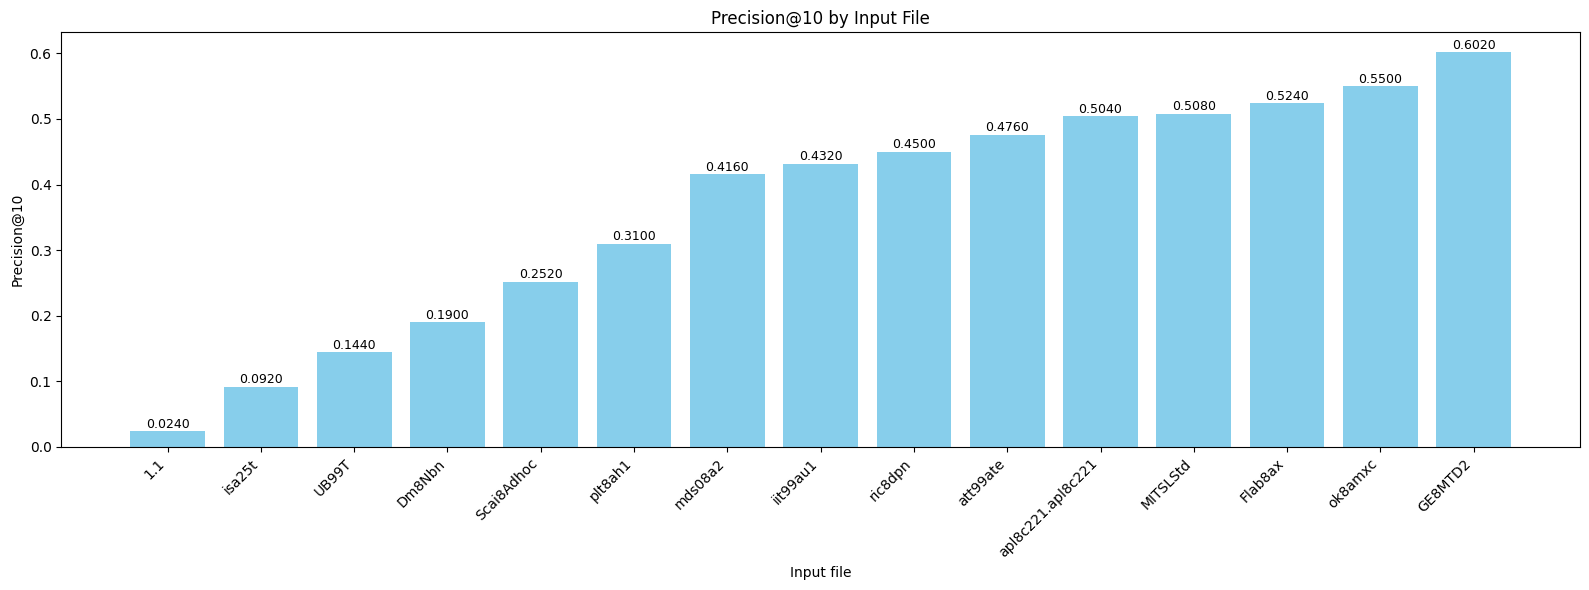

In [ ]:
# Sort by score
p10_sorted = precision_10_table.sort_values('P@10')

# Plot
plt.figure(figsize=[16, 6])
plt.bar(p10_sorted['input_file'], p10_sorted['P@10'], color='skyblue')

plt.xlabel('Input file')
plt.ylabel('Precision@10')
plt.title('Precision@10 by Input File')
plt.xticks(rotation=45, ha='right')

# Add value labels above bars
for i, v in enumerate(p10_sorted['P@10']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Precision @ 100

In [ ]:
def get_precision_at_100_values_table(verbose=False):
    # Collect all topics from all input files to build full topic list
    all_topics = set()
    for input_file in get_input_files():
        topics = get_unique_topics(dataset_merged, input_file)
        all_topics.update(topics)

    # Sort topics for consistency
    all_topics = sorted(list(all_topics))

    # Initialize DataFrame with 'topic' column
    precision_at_100_table = pd.DataFrame({'topic': all_topics})

    # Fill in precision at k values for each input file
    for input_file in get_input_files():
        p_100_values = []
        for topic in all_topics:
            value = precision_at_k(topic, input_file, k=100)
            p_100_values.append(value)
        # Add new column for this input file
        precision_at_100_table[input_file] = p_100_values

    if verbose:
        print(precision_at_100_table)

    precision_at_100_table.to_excel(output_file_path + "/precision_at_100_table.xlsx", index=False)

    return precision_at_100_table

In [ ]:
get_precision_at_100_values_table()

,topic,ok8amxc,plt8ah1,GE8MTD2,apl8c221.apl8c221,Scai8Adhoc,isa25t,ric8dpn,UB99T,1.1,Flab8ax,mds08a2,iit99au1,Dm8Nbn,att99ate,MITSLStd
0,401,0.05,0.06,0.82,0.49,0.01,0.03,0.00,0.03,0.01,0.10,0.03,0.07,0.04,0.32,0.20
1,402,0.31,0.16,0.31,0.36,0.11,0.06,0.25,0.06,0.00,0.36,0.22,0.20,0.19,0.23,0.23
2,403,0.20,0.21,0.20,0.21,0.21,0.17,0.18,0.11,0.00,0.21,0.20,0.21,0.18,0.21,0.21
3,404,0.29,0.15,0.24,0.29,0.09,0.00,0.28,0.13,0.01,0.25,0.30,0.25,0.04,0.26,0.27
4,405,0.15,0.06,0.22,0.25,0.07,0.00,0.14,0.06,0.00,0.19,0.12,0.14,0.05,0.17,0.12
5,406,0.12,0.10,0.10,0.13,0.08,0.00,0.13,0.01,0.00,0.11,0.13,0.12,0.02,0.12,0.12
6,407,0.33,0.21,0.22,0.30,0.22,0.12,0.29,0.07,0.03,0.39,0.24,0.37,0.10,0.44,0.29
7,408,0.39,0.29,0.31,0.44,0.05,0.25,0.38,0.07,0.01,0.43,0.36,0.34,0.16,0.33,0.42
8,409,0.10,0.02,0.12,0.11,0.01,0.00,0.10,0.04,0.00,0.10,0.10,0.07,0.04,0.07,0.09
9,410,0.59,0.00,0.51,0.57,0.62,0.00,0.61,0.01,0.00,0.60,0.59,0.52,0.17,0.60,0.62


In [ ]:
for input_file in get_input_files():
    _ = mean_precision_at_k(input_file, 100, verbose=True)


ok8amxc: 50 unique topics
P@100 - ok8amxc (Query 401):
         doc_id  rank  relevance
0   FBIS4-18182     0          0
1   FBIS3-18916     1          0
2   FBIS3-18833     2          0
3   FBIS3-39117     3          0
4   FBIS3-17077     4          0
..          ...   ...        ...
95  FBIS3-19490    95          0
96  FBIS4-42218    96          0
97  FBIS3-17087    97          0
98  FBIS3-19640    98          0
99  FBIS3-17784    99          0

[100 rows x 3 columns]
→ Relevant: 5 / 100 → P@100: 0.0500

P@100 - ok8amxc (Query 402):
             doc_id  rank  relevance
1000  LA062590-0042     0          1
1001  LA101290-0115     1          1
1002    FT933-16361     2          0
1003  LA042990-0032     3          1
1004  LA111689-0162     4          1
...             ...   ...        ...
1095  LA020190-0043    95          1
1096    FBIS4-44913    96          0
1097     FT931-2736    97          1
1098  LA122489-0017    98          0
1099     FT924-6621    99          0

[100 rows x 3

In [ ]:
precision_100_table = pd.DataFrame({'input_file': [], 'P@100': []})

for input_file in get_input_files():
    p100 = mean_precision_at_k(input_file, 100, verbose=False)
    row = pd.DataFrame({'input_file': [input_file], 'P@100': [p100]})
    precision_100_table = pd.concat([precision_100_table, row], ignore_index=True)

precision_100_table.index += 1
print("\nFinal Precision@100 Table:")
print(precision_100_table)

precision_100_table.to_excel(output_file_path + "/precision_at_100_table.xlsx", index=False)


Final Precision@100 Table:
           input_file   P@100
1             ok8amxc  0.2680
2             plt8ah1  0.1814
3             GE8MTD2  0.2718
4   apl8c221.apl8c221  0.2558
5          Scai8Adhoc  0.1362
6              isa25t  0.0404
7             ric8dpn  0.2252
8               UB99T  0.0792
9                 1.1  0.0138
10            Flab8ax  0.2690
11            mds08a2  0.2028
12           iit99au1  0.2146
13             Dm8Nbn  0.0820
14           att99ate  0.2498
15           MITSLStd  0.2558


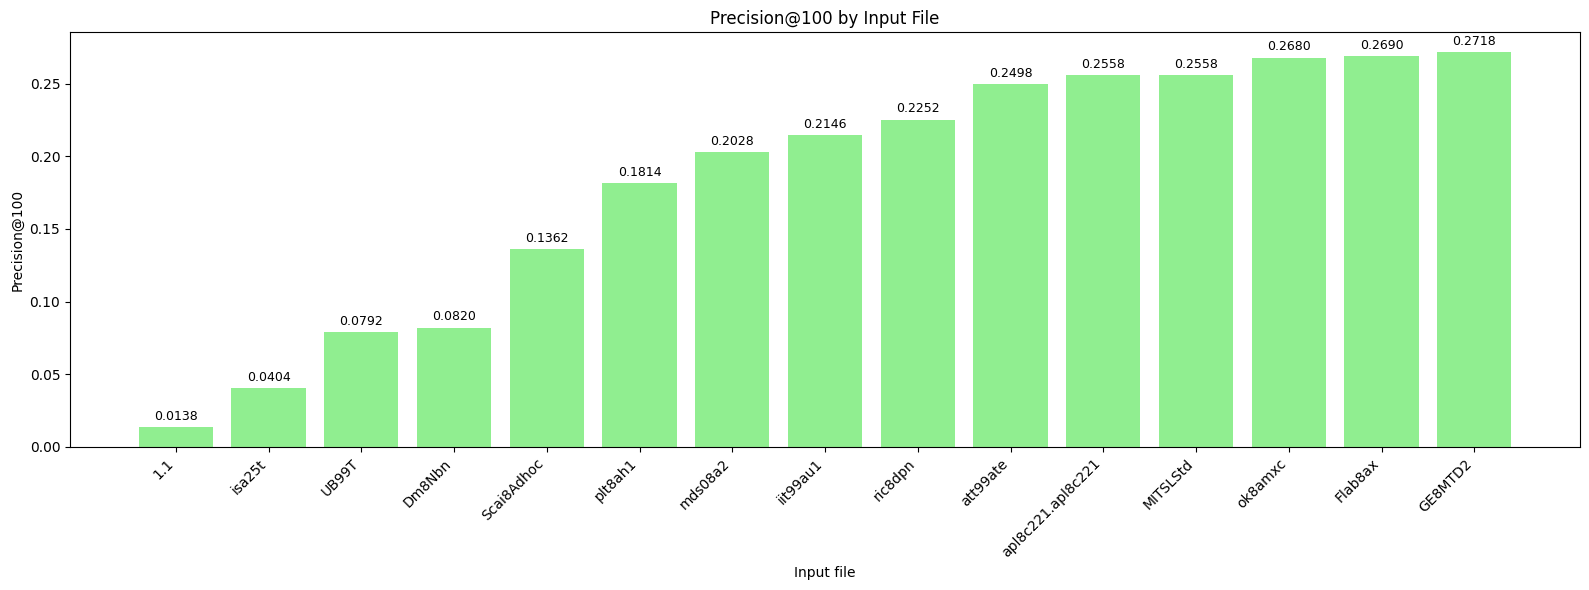

In [ ]:
p100_sorted = precision_100_table.sort_values('P@100')

plt.figure(figsize=[16, 6])
plt.bar(p100_sorted['input_file'], p100_sorted['P@100'], color='lightgreen')

plt.xlabel('Input file')
plt.ylabel('Precision@100')
plt.title('Precision@100 by Input File')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(p100_sorted['P@100']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### NDCG@10

In [ ]:
def dcg(relevance_scores):
    return sum(rel / np.log2(idx + 2) for idx, rel in enumerate(relevance_scores))


def ndcg_at_k(query_id, input_file, k=10, verbose=False):
    rows = dataset_merged[
        (dataset_merged['query_id'] == query_id) &
        (dataset_merged['input_file'] == input_file)
    ].sort_values('rank').head(k)

    actual = rows['relevance'].values
    ideal = sorted(actual, reverse=True)

    dcg_val = dcg(actual)
    idcg_val = dcg(ideal)
    ndcg = dcg_val / idcg_val if idcg_val > 0 else 0.0

    if verbose:
        print(f"NDCG@{k} - {input_file} (Query {query_id}):")
        print(rows[['doc_id', 'rank', 'relevance']])
        print(f"→ DCG: {dcg_val:.4f}, IDCG: {idcg_val:.4f} → NDCG@{k}: {ndcg:.4f}\n")

    return ndcg


def mean_ndcg_at_k(input_file, k=10, verbose=False):
    unique_queries = get_unique_topics(dataset_merged, input_file)
    if verbose:
        print(f"\n{input_file}: {len(unique_queries)} unique topics")

    total = 0.0
    for query_id in unique_queries:
        total += ndcg_at_k(query_id, input_file, k=k, verbose=verbose)

    return total / len(unique_queries)

In [ ]:
def get_ndcg_values_table(verbose=False):
    # Collect all topics from all input files to build full topic list
    all_topics = set()
    for input_file in get_input_files():
        topics = get_unique_topics(dataset_merged, input_file)
        all_topics.update(topics)

    # Sort topics for consistency
    all_topics = sorted(list(all_topics))

    # Initialize DataFrame with 'topic' column
    ndcg_10_table = pd.DataFrame({'topic': all_topics})

    # Fill in precision at k values for each input file
    for input_file in get_input_files():
        ndcg_10_values = []
        for topic in all_topics:
            value = ndcg_at_k(topic, input_file, k=10)
            ndcg_10_values.append(value)
        # Add new column for this input file
        ndcg_10_table[input_file] = ndcg_10_values

    if verbose:
        print(ndcg_10_table)

    ndcg_10_table.to_excel(output_file_path + "/ndcg_10_table.xlsx", index=False)

    return ndcg_10_table

In [ ]:
get_ndcg_values_table()

,topic,ok8amxc,plt8ah1,GE8MTD2,apl8c221.apl8c221,Scai8Adhoc,isa25t,ric8dpn,UB99T,1.1,Flab8ax,mds08a2,iit99au1,Dm8Nbn,att99ate,MITSLStd
0,401,0.000000,0.000000,1.000000,0.972665,0.000000,0.000000,0.000000,0.000000,0.000000,0.871079,0.000000,0.430677,0.000000,0.811785,0.679731
1,402,0.944159,0.806574,0.993078,0.988803,0.500000,0.000000,0.943473,0.000000,0.000000,0.997188,0.950531,0.967207,0.696137,0.958080,0.976633
2,403,1.000000,0.904407,1.000000,1.000000,0.997188,0.459239,0.977015,0.665704,0.000000,1.000000,0.832898,1.000000,0.858252,0.989595,0.950421
3,404,0.746570,0.000000,0.822372,0.943866,0.301030,0.000000,0.361815,0.301030,0.000000,0.732829,0.000000,0.693426,0.386853,0.422790,0.943866
4,405,0.906025,0.386853,0.914703,0.923842,0.457495,0.000000,0.637488,0.333333,0.000000,0.922326,0.570243,0.923596,0.693426,0.572607,0.564092
5,406,0.901307,0.519301,0.883824,0.801479,0.877215,0.000000,0.844978,0.000000,0.000000,0.719528,0.618289,0.814874,0.919721,0.918216,0.970929
6,407,0.993795,0.844331,0.958215,0.985151,0.786472,0.909877,0.819427,1.000000,0.430677,1.000000,0.851038,0.964363,0.573001,1.000000,0.913639
7,408,0.898006,0.817530,0.968209,0.752972,0.630930,0.801479,0.943866,0.000000,0.000000,0.917655,0.875646,0.931817,0.386853,0.693426,0.982892
8,409,0.906628,0.000000,1.000000,0.967468,0.000000,0.000000,0.605260,0.301030,0.000000,0.817530,0.797723,0.611283,0.919721,1.000000,0.750868
9,410,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.989595,0.000000,0.000000,1.000000,1.000000,1.000000,0.714908,1.000000,1.000000


In [ ]:
for input_file in get_input_files():
    _ = mean_ndcg_at_k(input_file, 10, verbose=True)


ok8amxc: 50 unique topics
NDCG@10 - ok8amxc (Query 401):
        doc_id  rank  relevance
0  FBIS4-18182     0          0
1  FBIS3-18916     1          0
2  FBIS3-18833     2          0
3  FBIS3-39117     3          0
4  FBIS3-17077     4          0
5  FBIS3-18684     5          0
6  FBIS3-19645     6          0
7   FBIS3-9104     7          0
8  FBIS3-59436     8          0
9   FT933-3792     9          0
→ DCG: 0.0000, IDCG: 0.0000 → NDCG@10: 0.0000

NDCG@10 - ok8amxc (Query 402):
             doc_id  rank  relevance
1000  LA062590-0042     0          1
1001  LA101290-0115     1          1
1002    FT933-16361     2          0
1003  LA042990-0032     3          1
1004  LA111689-0162     4          1
1005     FT923-7735     5          1
1006  LA080190-0099     6          0
1007    FT944-12908     7          1
1008    FBIS3-42996     8          0
1009    FBIS3-43034     9          0
→ DCG: 3.1201, IDCG: 3.3047 → NDCG@10: 0.9442

NDCG@10 - ok8amxc (Query 403):
                doc_id  ran

In [ ]:
ndcg_10_table = pd.DataFrame({'input_file': [], 'NDCG@10': []})

for input_file in get_input_files():
    ndcg10 = mean_ndcg_at_k(input_file, 10, verbose=False)
    row = pd.DataFrame({'input_file': [input_file], 'NDCG@10': [ndcg10]})
    ndcg_10_table = pd.concat([ndcg_10_table, row], ignore_index=True)

ndcg_10_table.index += 1
print("\nFinal NDCG@10 Table:")
print(ndcg_10_table)

ndcg_10_table.to_excel(output_file_path + "/mean_ndcg_at_10_table.xlsx", index=False)


Final NDCG@10 Table:
           input_file   NDCG@10
1             ok8amxc  0.788350
2             plt8ah1  0.557493
3             GE8MTD2  0.842076
4   apl8c221.apl8c221  0.751721
5          Scai8Adhoc  0.503452
6              isa25t  0.201301
7             ric8dpn  0.723340
8               UB99T  0.369002
9                 1.1  0.090590
10            Flab8ax  0.774913
11            mds08a2  0.678119
12           iit99au1  0.686211
13             Dm8Nbn  0.419050
14           att99ate  0.664249
15           MITSLStd  0.784600


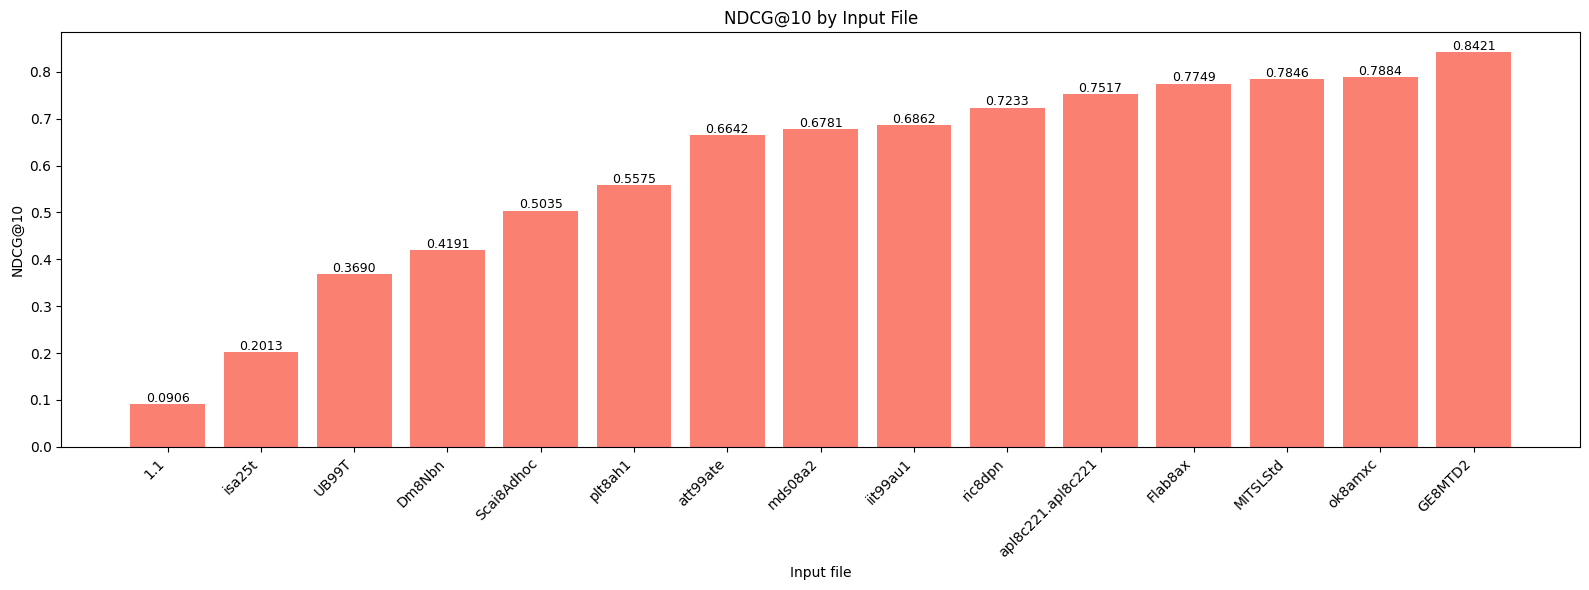

In [ ]:
ndcg10_sorted = ndcg_10_table.sort_values('NDCG@10')

plt.figure(figsize=[16, 6])
plt.bar(ndcg10_sorted['input_file'], ndcg10_sorted['NDCG@10'], color='salmon')

plt.xlabel('Input file')
plt.ylabel('NDCG@10')
plt.title('NDCG@10 by Input File')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(ndcg10_sorted['NDCG@10']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Correlation Coefficient

In [ ]:
# Merge all metrics into a single table on input_file
combined_metrics = precision_10_table.merge(
    precision_100_table, on='input_file'
).merge(
    ndcg_10_table, on='input_file'
).merge(
    mean_reciprocal_rank_table, on='input_file'
).merge(
    mean_average_precision_table, on='input_file'
)

# Rename columns for easier plotting
combined_metrics.columns = [
    'input_file', 'P@10', 'P@100', 'NDCG@10', 'MRR', 'MAP'
]

# Show the combined table
print(combined_metrics)

           input_file   P@10   P@100   NDCG@10       MRR       MAP
0             ok8amxc  0.550  0.2680  0.788350  0.838898  0.370851
1             plt8ah1  0.310  0.1814  0.557493  0.578839  0.233204
2             GE8MTD2  0.602  0.2718  0.842076  0.854583  0.385602
3   apl8c221.apl8c221  0.504  0.2558  0.751721  0.760638  0.355809
4          Scai8Adhoc  0.252  0.1362  0.503452  0.558842  0.214368
5              isa25t  0.092  0.0404  0.201301  0.184532  0.096457
6             ric8dpn  0.450  0.2252  0.723340  0.686687  0.325525
7               UB99T  0.144  0.0792  0.369002  0.392769  0.117923
8                 1.1  0.024  0.0138  0.090590  0.067761  0.026595
9             Flab8ax  0.524  0.2690  0.774913  0.768474  0.371684
10            mds08a2  0.416  0.2028  0.678119  0.627446  0.291730
11           iit99au1  0.432  0.2146  0.686211  0.666367  0.298487
12             Dm8Nbn  0.190  0.0820  0.419050  0.482526  0.131811
13           att99ate  0.476  0.2498  0.664249  0.596191  0.33

In [ ]:
# Only keep metric columns (drop 'input_file')
metric_only = combined_metrics.drop(columns='input_file')

# Spearman correlation matrix
correlation_matrix = metric_only.corr(method='spearman')
print("📊 Spearman Correlation Matrix:")
print(correlation_matrix)

# Pearson correlation
pearson_corr = metric_only.corr(method='pearson')
print("\n📊 Pearson Correlation Matrix:")
print(pearson_corr)

# Kendall's Tau correlation
kendall_corr = metric_only.corr(method='kendall')
print("\n📊 Kendall's Tau Correlation Matrix:")
print(kendall_corr)

📊 Spearman Correlation Matrix:
             P@10     P@100   NDCG@10       MRR       MAP
P@10     1.000000  0.996429  0.975000  0.975000  0.996429
P@100    0.996429  1.000000  0.967857  0.971429  1.000000
NDCG@10  0.975000  0.967857  1.000000  0.989286  0.967857
MRR      0.975000  0.971429  0.989286  1.000000  0.971429
MAP      0.996429  1.000000  0.967857  0.971429  1.000000

📊 Pearson Correlation Matrix:
             P@10     P@100   NDCG@10       MRR       MAP
P@10     1.000000  0.990646  0.981853  0.953514  0.993263
P@100    0.990646  1.000000  0.978876  0.947280  0.994646
NDCG@10  0.981853  0.978876  1.000000  0.985114  0.983102
MRR      0.953514  0.947280  0.985114  1.000000  0.952670
MAP      0.993263  0.994646  0.983102  0.952670  1.000000

📊 Kendall's Tau Correlation Matrix:
             P@10     P@100   NDCG@10       MRR       MAP
P@10     1.000000  0.980952  0.923810  0.923810  0.980952
P@100    0.980952  1.000000  0.904762  0.904762  1.000000
NDCG@10  0.923810  0.904762  1.

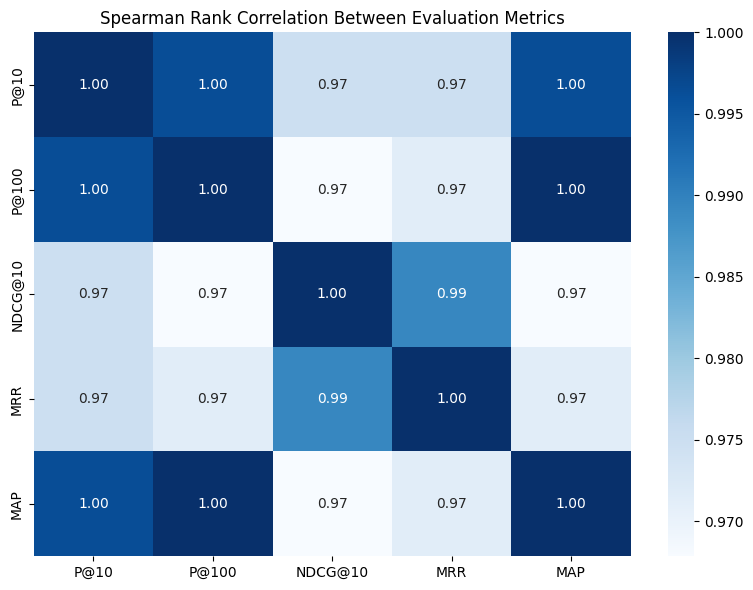

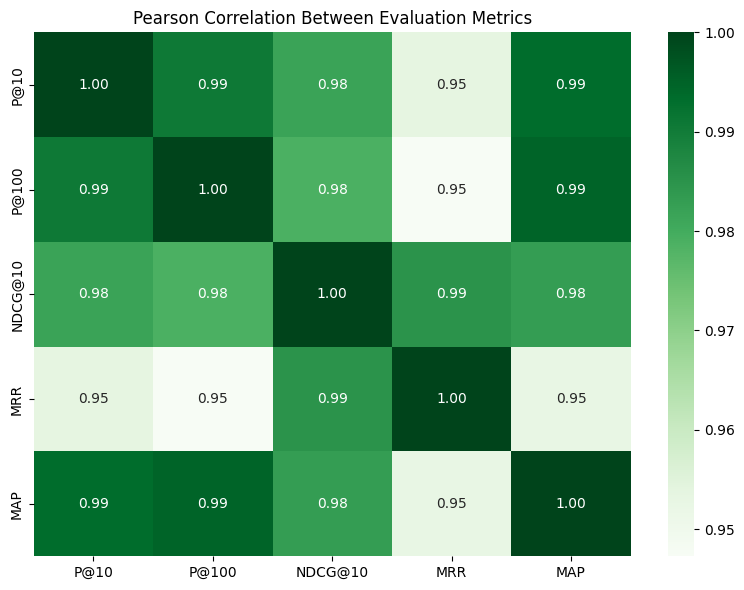

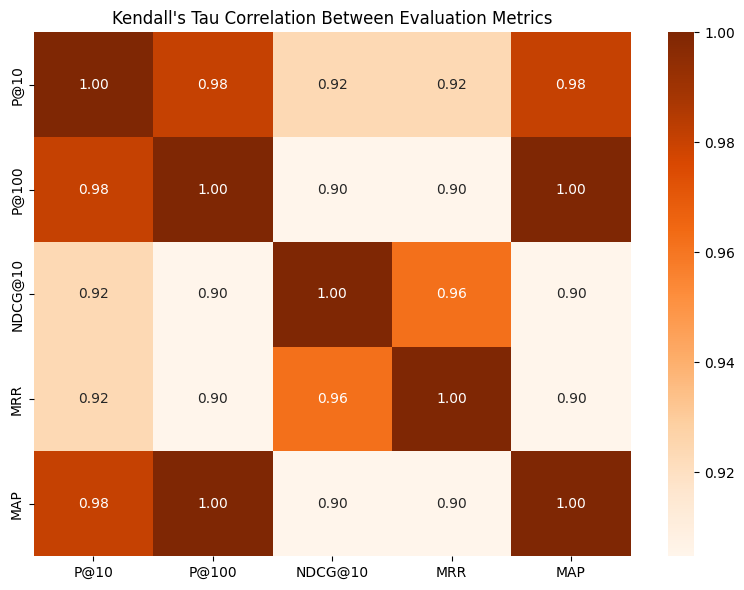

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Spearman Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Spearman Rank Correlation Between Evaluation Metrics')
plt.tight_layout()
plt.show()

# Pearson Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='Greens', fmt=".2f")
plt.title("Pearson Correlation Between Evaluation Metrics")
plt.tight_layout()
plt.show()

# Kendall's Tau Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Kendall's Tau Correlation Between Evaluation Metrics")
plt.tight_layout()
plt.show()


# Conclusion